In [50]:
import numpy as np
import matplotlib.pyplot as plt

## Principe



### Relier des points

In [ ]:
"""liste d'abscisses et liste d'ordonnées"""
x= [1,1.5,2,2.5,3]
y= [1,4,3,4,1]
""" La figure, et les axes """
fig,ax=plt.subplots(1,3)
""" on règle la taille de la figure """
fig.set_size_inches(12,3)
""" on divise la figure en 1-ligne, 3-colonnes, et on affiche le premier graphique """
ax[0].plot(x,y)
"""puis le second graphique"""
ax[1].plot(x,y,'o') #essayez aussi avec '.' ou '*'
"""puis le troisième"""
ax[2].plot(x,y,'o-');

###  Graphe de fonction $\triangleright$

En reliant finement des points, on peut tracer le graphe de fonctions lisses, avec un graphe... lisse!

In [ ]:
x=np.linspace(0,5,100) # 100 points répartis entre 0 et 5
fig,ax=plt.subplots()

"""attention 'lambda' est un mot clef réservé de python. du coup j'utilise 'lamb' """
for lamb in [0.1,0.3,1,2]:
    y=np.exp(lamb*x)
    ax.plot(x,y,label=r"$\lambda:$"+str(lamb))

"""on limite les ordonnées."""
ax.set_ylim([0,5])
ax.legend();

***A vous:*** Pourquoi $(1\heartsuit)$ est-ce important de limiter les ordonnées dans ce graphique ?

## Aligner des graphiques

Voici le type de graphique que vous serez très souvent ammené à faire. Pour gagner en efficacité, il faut connaitre la syntaxe sur le bout des doigts.

In [51]:
def plot_sin_cos(frequencies,phases):

    ni=len(frequencies)
    nj=len(phases)

    #astuce on fait un 'figsize' qui dépend de ni et nj (attention à l'inversion de l'ordre).
    #Cela permet à chaque ax d'avoir la même taille.
    fig,axs=plt.subplots(ni,nj,sharex="all",sharey="all",figsize=(3*nj,2*ni))
    axs=axs.reshape([ni,nj])

    T=2*np.pi

    x=np.linspace(0,T,1000)

    for i,freq in enumerate(frequencies):
        for j,ph in enumerate(phases):
            axs[i,j].plot(x,np.sin(ph+x*freq),label="sin")
            axs[i,j].plot(x,np.cos(ph+x*freq),label="cos")
            axs[i,j].set_title(f"freq:{freq:.2f}, phase:{ph:.2f}")
            axs[i,j].set_xlabel("x")
            axs[i,j].set_xticks([0,np.pi,2*np.pi])
            axs[i,j].set_xticklabels([0,r"$\pi$",r"2$\pi$"])

    axs[0,0].legend() #fait apparaitre les labels
    fig.tight_layout() #gère l'espacement au mieux

In [52]:
frequencies=[0.5,1,2]
phases=[0,np.pi/2,np.pi]
plot_sin_cos(frequencies,phases)

***L'astuce du reshape:*** La fonction `plt.subplots` est bizarrement construite:

* Avec  `n>1`, quand on fait `axs=plt.subplots(1,n)` ou bien `plt.subplots(n,1)`, cela renvoie un vecteur numpy dont les éléments sont des `axes`. Il faut donc faire ensuite `axs[i].plot(...)`


* Avec  `ni>1` et `nj>1`, quand on fait `axs=plt.subplots(ni,nj)` cela renvoie une matrice numpy dont les éléments sont des `axes`. Il faut donc faire ensuite `axs[i,j].plot(...)`

* Et pour finir `axs.subplots(1,1)` renvoie un simple objet de type `axes`, il faut donc faire ensuite `axs.plot(...)`








***Question:*** Dans le programme précédent, quelle astuce a-t-on employée pour que  `plot_sin_cos(frequencies,phases)` fonctionne encore quand la liste `frequencies` ou `phases` est de taille 1. Est-ce que cela marche encore si les 2 listes sont de taille taille 1?


#### → ♡

***Réponse:***


***Exo:*** de mémoire, indiquez dans quel contexte apparaissent les mots clés suivants:

    subplots,sharex,sharey,figsize,label,set_xlabel,set_xticks,set_xticklabels,legend,tight_layout

Attention, il y a aussi une méthode `plt.subplot` (sans s), qui fait autre chose.

#### →♡♡♡♡

Modifiez la fonction `plot_sin_cos` pour obtenir le graphique ci-dessous (plus dépouillé).

In [53]:
def plot_sin_cos_mieux(frequencies,phases):



In [54]:
frequencies=[1,2,3,4]
phases=np.arange(0,7,1)
plot_sin_cos_mieux(frequencies,phases)

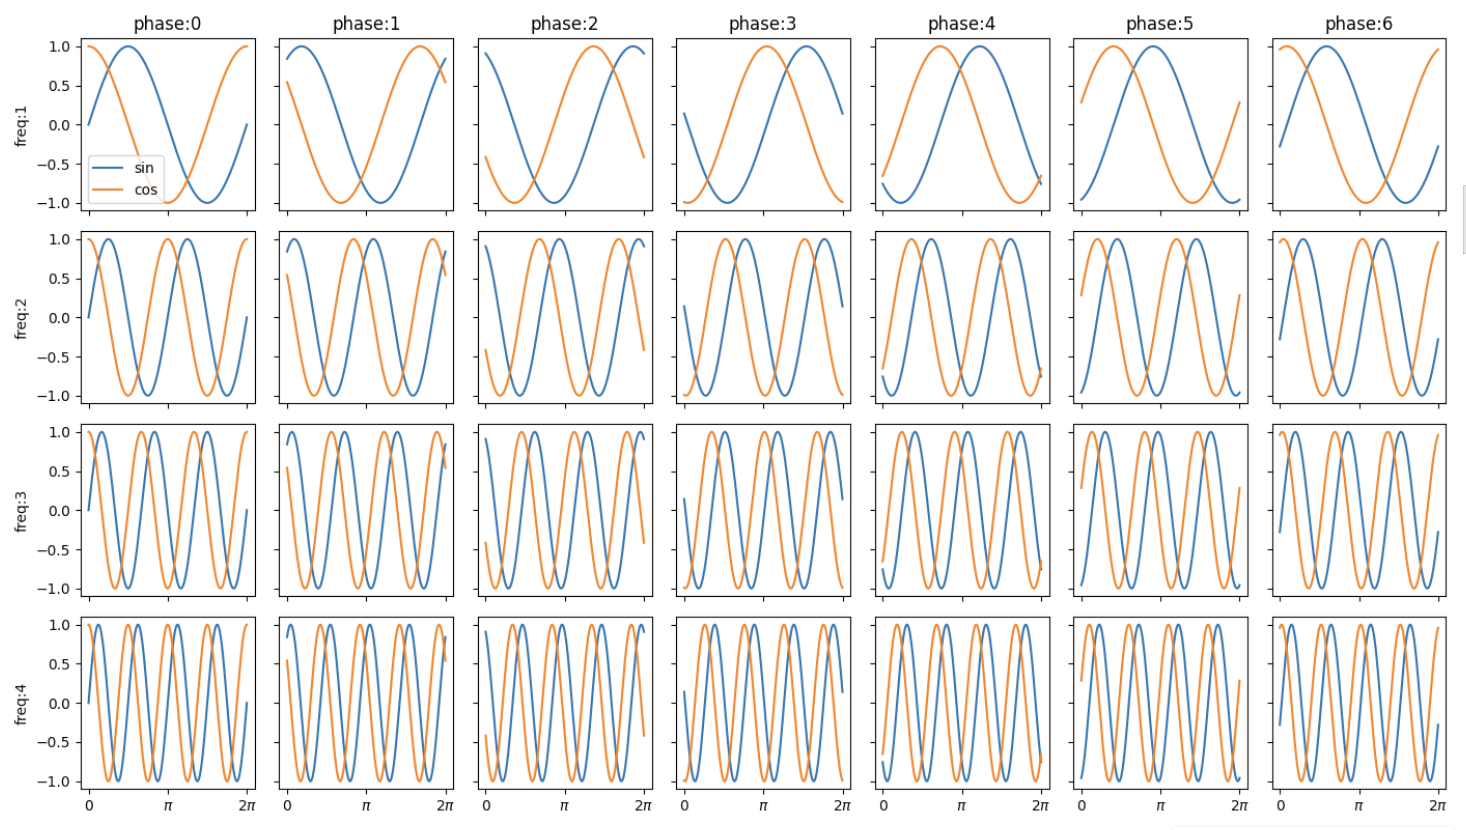

## Surfaces

Pour observer le graphe d'une fonction de $\mathbb R^2$ dans $\mathbb R$, on peut faire un graphique en 3d. Mais, personnellement, je trouve que les tracés en niveau de couleur sont beaucoup plus clairs: la couleur remplace la troisème dimension.



### Afficher une matrice

Par défaut, l'échelle des couleurs va du bleu foncé au jaune clair.

***Conseil:*** dès que vous avez plusieurs boites-graphiques, précisez à la main l'échelle de couleur de manière à ce qu'elle soit commune à toutes les boites-graphiques.

In [55]:
M=np.array([[-10,2,3], [4,5,6], [7,8,9], [10,11,12], [13,14,15]])
print(M)

fig,ax=plt.subplots(1,2)
img0=ax[0].imshow(M,vmin=-20, vmax=30) # on précise l'échelle de couleur
img1=ax[1].imshow(2*M.T,vmin=-20, vmax=30)

"""Attention, il faut passer le résultat de imshow() en argument de colorbar(). """
fig.colorbar(img0); #on aurait pu mettre `img1`: cela ne change rien quand on précise vmin et vmax

Comparons les lissages:

In [56]:
fig,axs=plt.subplots(1,4,figsize=(12,4))
axs[0].imshow(M) #identique àinterpolation="nearest"
axs[1].imshow(M,interpolation="bilinear")
axs[2].imshow(M,interpolation="bicubic")
axs[3].imshow(M,interpolation="spline16");

In [57]:
""" une variante, avec les indices placé différemment"""
fig,ax=plt.subplots()
img=ax.matshow(M)
fig.colorbar(img); #on n'a pas précisé vmin et vmax, ce sera donc le min et le max de la matrice

### Afficher le graphe d'une fonction

Maintenant on va voir comment on crée le graphe d'une fonction de $\mathbb R^2$ dans $\mathbb R$. On commence par créer deux matrices où l'on répète les abscisses et les ordonnées.

In [58]:
x=np.linspace(0,2,11)
y=np.linspace(1,2,11)
XX,YY=np.meshgrid(x,y)

print("XX\n",XX)
print("YY\n",YY)

fig,ax=plt.subplots(1,2)
ax[0].imshow(XX);
ax[1].imshow(YY);

Ensuite, on utilise nos tableaux d'abscisses et d'ordonnées `XX` et `YY` comme si c'était les variables de la fonction $F(x,y)$ que l'on veut tracer. Observez, puis analysez pourquoi cela fonctionne. Dans le code ci-dessous, on utilise aussi des options intéressantes de `plt.imshow()`:

* `origin='lower'`: pour mettre l'origine en bas comme on aime en math. Attention, par défaut `origin='upper'`: car c'est la convention classique des écrans et des matrices.
* `extent=[x_min,x_max,y_min,y_max]`: permet de préciser l'échelle.
* `cmap='jet'`:
    * `='coolwarm'`: l'échelle des couleurs étant une échelle de 'chaleur'
    * `='jet'`: (ma préférée) aussi une échelle de 'chaleur', plus artificielle, mais avec plus de contrastes.
    * `='grey'`: en niveau de gris.
*  `vmin=..., vmax=...`: l'échelle des couleurs. Par défaut  `vmin=min(data)`, `vmax=max(data)`.
* `interpolation=...`
    * `='nearest'`: chaque case de la matrice est représentée par un carré. C'est l'option par défaut sauf dans certaines versions. :-(
    * `='bilinear'`: l'image est lissée.


#### →♡♡♡

In [59]:
x_min,x_max,y_min,y_max=-4,4,-2,2

x = np.linspace(x_min, x_max, 50)
y = np.linspace(y_min, y_max, 50)
XX,YY=
F=


fig,ax=plt.subplots(1,1)
img=
ax.set_xlabel("x")
ax.set_ylabel("y");

Attention, il y a quelque chose de pas tout à fait naturel dans le programme suivant:

* La variation en x se fait sur le second indice du tenseur `F`
* La variation en y se fait sur le premier indice du tenseur `F`

C'est `meshgrid` qui fait ce travail d'inversion. Cela permet aux `x` de retrouve en abscisse et `y` en ordonnée.


D'après-vous, à quoi sert l'argument `indexing`:

    np.meshgrid(...,indexing="xy")
    np.meshgrid(...,indexing="ij")





### Indexing `ij` sans meshgrid




Voici le même programme, où les deux variables s'appelles `a0` et `a1` et correspondent au premier et second indice du tenseur `F`. On va même se passer de `meshgrid`, le broadcasting fait le travail tout seul.

In [60]:
a0_min,a0_max,a1_min,a1_max=-4,4,-2,2

a0 = np.linspace(a0_min, a0_max, 50)
a1 = np.linspace(a1_min, a1_max, 50)
aa0=a0[:,None]
aa1=a1[None,:]

F=np.exp(-0.5*((aa0/2)**2+(aa1-2)**2))
print(F.shape)

fig,ax=plt.subplots(1,1)
#attention au 'extent' qu'il faut inverser
img=ax.imshow(F,origin='lower',extent=[a1_min,a1_max,a0_min,a0_max],cmap='jet',interpolation='bilinear')
ax.set_xlabel("a1")
ax.set_ylabel("a0");

## `pcolormesh`

### et ses variantes

Pour `pcolormesh` et ses variantes, il faut préciser l'emplacement des points.

In [61]:
x=np.linspace(0,1,20)
y=np.linspace(0,1,20)

X,Y=np.meshgrid(x,y)
F=X*Y

fig,(ax0,ax1,ax2,ax3,ax4)=plt.subplots(5,1,figsize=(4,20),sharex="all")
ax0.imshow(F,extent=[0,1,0,1],origin="lower",interpolation="bilinear") #pourquoi n'a-t-on pas besoin de mettre X et Y
ax1.pcolormesh(X,Y,F,shading="gouraud")
ax2.contour(x,y,F) #notez que c'est petit x et petit y qu'on indique
ax3.contourf(x,y,F)
ax4.contourf(x,y,F,50); #que signigie 50 ?


###  sur grille non cartésienne

In [62]:
#sur grille cartésienne
X=np.array([[0,1,2],[0,1,2]])
Y=np.array([[3,3,3],[5,5,5]])
F=X+Y
fig,ax=plt.subplots()
ax.pcolormesh(X,Y,F);

In [63]:
#sur grille non cartésienne
X=np.array([[0,1,2],[0,1,2]])
Y=np.array([[3,3.5,4],[5,5.6,6]])
fig,ax=plt.subplots()

#on garde le même F
ax.pcolormesh(X,Y,F);

Voici un tracé dont les variables s'appelle `R,Theta`

In [64]:
r=np.linspace(0,1,100)
theta=np.linspace(0,np.pi/2,100)
R,Theta=np.meshgrid(r,theta)

F=R**2

fig,ax=plt.subplots()
ax.pcolormesh(R,Theta,F);


Il serait plus sympa de le mettre sur une grille polaire non ?

#### →♡♡♡

In [65]:
fig,ax=plt.subplots()
ax.pcolormesh(


***Aide:*** Pour créer le graphique ci-dessous, on n'a pas changer de matrice `F`. C'est `X`et `Y`qu'il faut bien choisir.

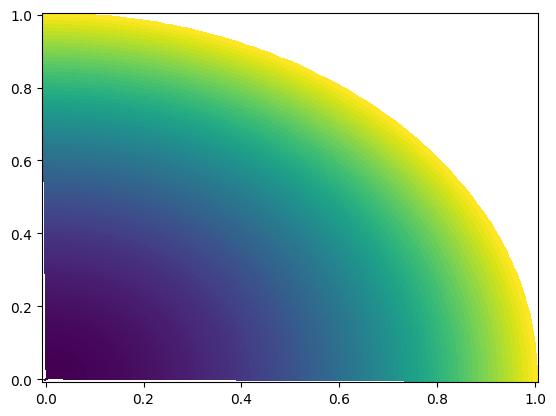

## Scatter point

### Pour tracer des data-points

In [66]:
fig,(ax,ax1)=plt.subplots(2,1)
data_position_x=np.linspace(0,10,10)
data_position_y=np.linspace(0,10,10)
data_value=data_position_x**2

#que signifie c et s ?
colors=ax.scatter(data_position_x,data_position_x,c=data_value,s=data_value,cmap="jet",marker="o",edgecolor="k");
plt.colorbar(colors,ax=ax);


#le plot classique offre moins d'option.
ax1.plot(data_position_x,data_position_y,"o");

Dans la commande:


    plt.colorbar(colors,ax=ax);

il faut préciser le `plot` d'où vienne les couleurs, et sur quel axe on accroche la colorbar.

### Pour tracer une fonction

C'est la technique du fénéant. Elle permet de se passer complètement d'une grille.

In [70]:
def f(x,y):
    return np.sin(5*x**2)*np.sin(3*y**2)

#### →♡♡

In [71]:
x=np.random.uniform(-1,1,20_000)
y=np.random.uniform(-1,1,20_000)

fig,ax=plt.subplots()
ax.scatter(


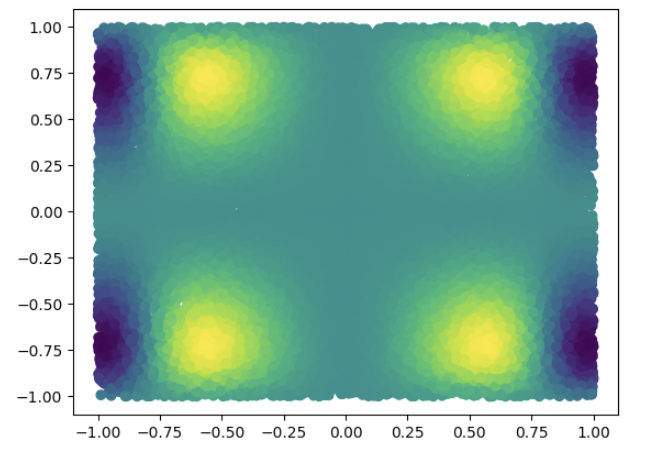

## AxesGrid

Une extension qui permet de faire des choses impossible à faire avec le simple `subplots`.

* Les gaphiques partagent la même échelle verticallement et horizontalle
* avec `aspect=True` l'échelle des abcisses est la même que celle des ordonnée (c'est l'équivalent de `ax.set_aspect('equal')`)
* Pour les imshow, on peut facilement positionner les colorbar
* Attention, il produit un vecteur d'axes.

### Pour des graphiques alignés avec la même échelle en abscisse et en ordonnée

In [164]:
from mpl_toolkits.axes_grid1 import AxesGrid

x=np.linspace(0.001,1,1000)

ni=3
nj=2

fig=plt.figure(1,figsize=(nj*3,ni*3))
grid=AxesGrid(fig,111,nrows_ncols=(ni,nj),axes_pad=0,aspect=True)


for i in range(ni):
    for j in range(nj):
        grid[i*nj+j].plot(x,x**(i+1)+j)

### Pour bien mettre les colorbar

In [160]:

ni=6
nj=2

fig=plt.figure(1,figsize=(nj*3,ni*3))
grid=AxesGrid(fig,111,nrows_ncols=(ni,nj),
                    axes_pad=0.2,
                    label_mode="L",
                    share_all=True,
                    cbar_location="right",
                    cbar_mode="edge",
                    cbar_size="4%",
                    cbar_pad="0%")


x=np.linspace(-2+i,1,100)
xx,yy=np.meshgrid(x,x)


for i in range(ni):
    signal=(i+1)*np.sin((i+1)*xx)*np.cos((i+1)*yy+j)
    signal_noisy=signal+np.random.normal(size=signal.shape)
    signal_both=np.stack([signal,signal_noisy])
    mini,maxi=np.min(signal_both),np.max(signal_both)

    #pour éviter de réécrire les même choses, on utilise un dictionnaire que l'on passe en argument avec **kwarg
    kwarg={"vmin":mini,"vmax":maxi,'extent':[0,i+1,0,i+1]}
    grid[2*i].imshow(signal,**kwarg)
    im=grid[2*i+1].imshow(signal_noisy,**kwarg)

    grid.cbar_axes[i].colorbar(im)

On avait l'exigence suivante pour ce dessin:

Les graphiques alignées devait partageaient la même colorbar.Il fallait donc imposer une vmin et une vmax.